<a href="https://colab.research.google.com/github/ShivathejS/project/blob/main/Customerchurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [17]:
df = pd.read_csv('Churn_Modelling.csv')

In [18]:
df['IsActiveMember'].value_counts()

,count
IsActiveMember,
1,5151
0,4849


In [19]:
df.drop(columns=['RowNumber','CustomerId', 'Surname'], inplace = True)

In [23]:
df[df['Exited'] == 1].sample(5)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5134,850,France,Female,55,10,98488.08,1,1,0,155879.57,1
3316,666,France,Male,53,5,64646.70,1,1,0,128019.48,1
35,475,France,Female,45,0,134264.04,1,1,0,27822.99,1
4946,546,France,Female,47,8,0.00,1,1,1,66408.01,1
6669,517,France,Male,56,9,142147.32,1,0,0,39488.04,1


In [26]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'],drop_first=True)

In [31]:
x = df.drop(columns = ['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=1)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train_1 = sc.fit_transform(x_train)
x_test_1 = sc.fit_transform(x_test)

In [39]:
x_train_1


array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [40]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [52]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation ='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [62]:
history = model.fit(x_train_1,y_train, epochs=100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8683 - loss: 0.3207 - val_accuracy: 0.8506 - val_loss: 0.3524
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8690 - loss: 0.3219 - val_accuracy: 0.8537 - val_loss: 0.3467
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8690 - loss: 0.3090 - val_accuracy: 0.8544 - val_loss: 0.3466
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8771 - loss: 0.3073 - val_accuracy: 0.8519 - val_loss: 0.3470
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8686 - loss: 0.3221 - val_accuracy: 0.8525 - val_loss: 0.3467
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8738 - loss: 0.3144 - val_accuracy: 0.8519 - val_loss: 0.3485
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.3272 - val_accuracy: 0.8525 - val_loss: 0.3474
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8648 - loss: 0.3243 - val_accu

In [64]:
model.layers[2].get_weights()

[array([[ 0.9574828 ],
        [ 1.3892217 ],
        [-0.705758  ],
        [ 0.4867733 ],
        [-0.7440646 ],
        [-0.76963615],
        [-1.2983205 ],
        [-0.98544586],
        [-0.5206103 ],
        [ 0.9896756 ],
        [ 0.9896227 ]], dtype=float32),
 array([0.0500258], dtype=float32)]

In [65]:
y_log = model.predict(x_test_1)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [66]:

y_pred = np.where(y_log>0.5,1,0)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8635

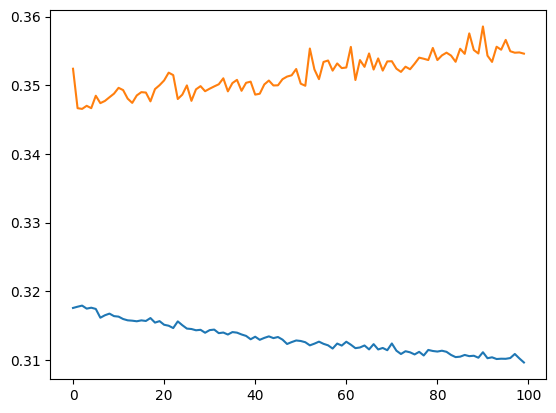

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
